In [25]:
import pandas as pd
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = pd.read_csv('../final_csv/reduced_iris.csv')
raisin = pd.read_csv('../final_csv/reduced_raisin.csv')

Number of columns: 5
Accuracy: 0.97
Cross-Validation Scores: [0.97, 0.95, 0.95, 1.0]

Raisin Column: class  --  Species 


    Species  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0            5.1           3.5            1.4           0.2
1         0            4.9           3.0            1.4           0.2
2         0            4.7           3.2            1.3           0.2
3         0            4.6           3.1            1.5           0.2
4         0            5.0           3.6            1.4           0.2
..      ...            ...           ...            ...           ...
145       1            6.7           3.0            5.2           2.3
146       1            6.3           2.5            5.0           1.9
147       1            6.5           3.0            5.2           2.0
148       1            6.2           3.4            5.4           2.3
149       1            5.9           3.0            5.1           1.8

[150 rows x 5 columns]
<class 'numpy

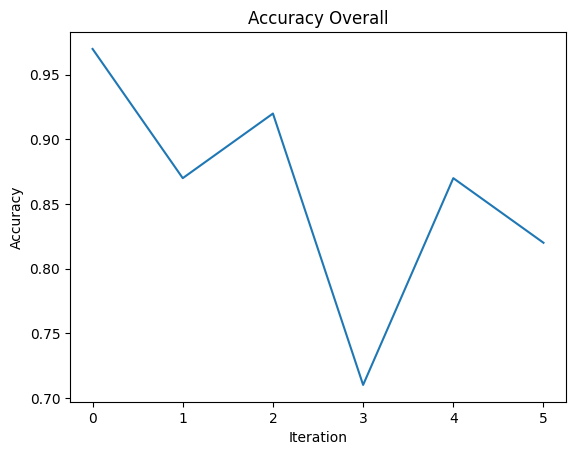

In [26]:
from sklearn.neighbors import KNeighborsClassifier

num_columns = iris.shape[1]
print("Number of columns:", num_columns)
iris = iris[['Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
iris_columns = iris.columns
raisin_columns = raisin.columns

accuracy_overall = []

data = pd.DataFrame(iris)
X = data.drop('Species', axis=1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
accuracy_overall.append(accuracy)
#f1_score = round(metrics.f1_score(y_test, y_pred), 2)
#auc_score = round(roc_auc_score(y_test, y_pred), 2)
cross_val_scores = cross_val_score(knn_classifier, X, y, cv=4)
cross_val_scores = [round(score, 2) for score in cross_val_scores]

print("Accuracy:", accuracy)
#print("F1 Score:", f1_score)
#print("AUC Score:", auc_score)
print("Cross-Validation Scores:", cross_val_scores)

data2 = pd.DataFrame(data)
for index in range(num_columns):
    print("\nRaisin Column:", raisin_columns[index], " -- ", iris_columns[index], "\n\n")
    data.iloc[:,index] = raisin.iloc[:,index]
    print(data)
    #data[iris_columns[index]] = raisin[raisin_columns[index]]

    #difference = data.compare(data2)
    #print("eddddd", difference)
    X = data.drop('Species', axis=1)
    y = data['Species'].astype('int')

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(X_train, y_train)

    y_pred = knn_classifier.predict(X_test)

    accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    accuracy_overall.append(accuracy)
    #f1_score = round(metrics.f1_score(y_test, y_pred), 2)
    #auc_score = round(roc_auc_score(y_test, y_pred), 2)
    cross_val_scores = cross_val_score(knn_classifier, X, y, cv=4)
    cross_val_scores = [round(score, 2) for score in cross_val_scores]


    print("Accuracy:", accuracy)
    #print("F1 Score:", f1_score)
    #print("AUC Score:", auc_score)
    print("Cross-Validation Scores:", cross_val_scores)

plt.plot(accuracy_overall)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Overall')
plt.show()